Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


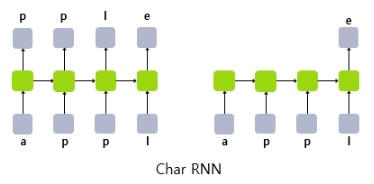

In [2]:
### CIS 4120 NLP Fall 2023
### Assignment 4

### In this assignment, we are going to build a text generation model (char-level) using the same data that we have used in the Session 22.
### You need to build a model following the given a set of conditions.
### NOTICE: Note that the goal of this assignment is to build a model which looks like the right-hand-side model in the image whereas we have built the left-hand-side model in the Session 22.
### You can always review the Session 22 contents and other materials from the internet sources, if needed, to work on the assignment 4.

#connect Colab to your Google Drive.
from google.colab import drive
import os
drive.mount('/content/gdrive')

from IPython.display import Image
Image('/CIS 4120 - NLP/Assignment 4/different char rnn model.PNG')


In [3]:
#Import the necessary libs which are already given to you.
import pandas as pd
import numpy as np
from string import punctuation
import urllib.request

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [4]:
#load the data.
# http://www.gutenberg.org/files/11/11-0.txt
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # read line by line.
    sentence = sentence.strip() # remove \r, \n by using strip().
    sentence = sentence.lower() # lower-casing.
    sentence = sentence.decode('ascii', 'ignore') # remove such as \xe2\x80\x99
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [5]:
print (*sentences[:5], sep='\n')
print (sentences[:5])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online at
['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll', 'this ebook is for the use of anyone anywhere in the united states and', 'most other parts of the world at no cost and with almost no restrictions', 'whatsoever. you may copy it, give it away or re-use it under the terms', 'of the project gutenberg license included with this ebook or online at']


In [6]:
#put every element together.
total_data = ' '.join(sentences)
print(len(total_data))

159484


In [7]:
total_data[5000:7000]

' it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know. please, maam, is this new zealand or australia? (and she tried to curtsey as she spokefancy _curtseying_ as youre falling through the air! do you think you could manage it?) and what an ignorant little girl shell think me for asking! no, itll never do to ask: perhaps i shall see it written up somewhere. down, down, down. there was nothing else to do, so alice soon began talking again. dinahll miss me very much to-night, i should think! (dinah was the cat.) i hope theyll remember her saucer of milk at tea-time. dinah my dear! i wish you were down here with me! there are no mice in the air, im afraid, but you might catch a bat, and thats very like a mouse, you know. but do cats eat bats, i wonder? and here alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, do cats eat bats? do cats eat bats? and sometimes, do bats eat cats? for, you see, a

## Start working on after this line:

In [ ]:
######################### Start working on after this line:
######################### Start working on after this line:
######################### Start working on after this line:

In [8]:
#take out a random sub-set of the text and save it to a new variable called raw_text.
# raw_text will be the data we will use for this assignment.
raw_text='''
it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know. please, maam, is this new zealand or australia? (and she tried to curtsey as she spokefancy _curtseying_ as youre falling through the air! do you think you could manage it?) and what an ignorant little girl shell think me for asking! no, itll never do to ask: perhaps i shall see it written up somewhere. down, down, down. there was nothing else to do, so alice soon began talking again. dinahll miss me very much to-night, i should think! (dinah was the cat.) i hope theyll remember her saucer of milk at tea-time. dinah my dear! i wish you were down here with me! there are no mice in the air, im afraid, but you might catch a bat, and thats very like a mouse, you know. but do cats eat bats, i wonder? and here alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, do cats eat bats? do cats eat bats? and sometimes, do bats eat cats? for, you see, as she couldnt answer either question, it didnt much matter which way she put it. she felt that she was dozing off, and had just begun to dream that she was walking hand in hand with dinah, and saying to her very earnestly, now, dinah, tell me the truth: did you ever eat a bat? when suddenly, thump! thump! down she came upon a heap of sticks and dry leaves, and the fall was over. alice was not a bit hurt, and she jumped up on to her feet in a moment: she looked up, but it was all dark overhead; before her was another long passage, and the white rabbit was still in sight, hurrying down it. there was not a moment to be lost: away went alice like the wind, and was just in time to hear it say, as it turned a corner, oh my ears and whiskers, how late its getting! she was close behind it when she turned the corner, but the rabbit was no longer to be seen: she found herself in a long, low hall, which was lit up by a row of lamps hanging from the roof. there were doors all round the hall
'''

In [9]:
#remove unnecessary space such as newline break.
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know. please, maam, is this new zealand or australia? (and she tried to curtsey as she spokefancy _curtseying_ as youre falling through the air! do you think you could manage it?) and what an ignorant little girl shell think me for asking! no, itll never do to ask: perhaps i shall see it written up somewhere. down, down, down. there was nothing else to do, so alice soon began talking again. dinahll miss me very much to-night, i should think! (dinah was the cat.) i hope theyll remember her saucer of milk at tea-time. dinah my dear! i wish you were down here with me! there are no mice in the air, im afraid, but you might catch a bat, and thats very like a mouse, you know. but do cats eat bats, i wonder? and here alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, do cats eat bats? do cats eat bats? and sometimes, do bats eat cats? for, you see, as 

In [18]:
#generate a character (not vocab) set.
#YOUR CODE HERE:

# All possible characters
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print(vocab_size)

# Character dictionary
char_dict = dict((char, index) for index, char in enumerate(char_vocab))
print(char_dict)

36
{' ': 0, '!': 1, '(': 2, ')': 3, ',': 4, '-': 5, '.': 6, ':': 7, ';': 8, '?': 9, '_': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'y': 34, 'z': 35}


In [19]:
# assign an unique integer to each character.
#YOUR CODE HERE:

# Switching key and value so the key is the numeric index
index_to_char = {}
for key, value in char_dict.items():
    index_to_char[value] = key
print(index_to_char)

{0: ' ', 1: '!', 2: '(', 3: ')', 4: ',', 5: '-', 6: '.', 7: ':', 8: ';', 9: '?', 10: '_', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'y', 35: 'z'}


## How to generate a data set for this task:

In [ ]:
######################### how to generate a data set for character generation model:
# what we're trying to create is the below (just like the right-hand-side figure):

# appl (input sequence) -> e (output sequence that needs to be predicted based on the input sequence)
#train_X = 'appl'
#train_y = 'e'

In [20]:
# We define the length of our input sequence as 10 & the length of our output sequence as 1
# -> total 11 length of input & output sequence length.

seq_length = 10+1


In [21]:
#iterate over the raw_text to generate consecutive sequence of 11 characters.
#The first 10 actual outputs are printed out below.
#The code is given for this part.
sequences = []
for i in range(seq_length, len(raw_text)):
  # 0:11, 1:12, 2:13
    seq = raw_text[i-seq_length:i]
    sequences.append(seq)
print( len(sequences))


1980


In [22]:
#note that every element list consists of 11 character length (including space).
sequences[:10]

['it didnt so',
 't didnt sou',
 ' didnt soun',
 'didnt sound',
 'idnt sound ',
 'dnt sound a',
 'nt sound at',
 't sound at ',
 ' sound at a',
 'sound at al']

In [31]:
# integer encoding using a character (not vocab) set.
#YOUR CODE HERE:
seq_encoded = [] # The whole data, Each entry: 10 for x + 1 for y

for seq in sequences:
  # For each sequence: 'it didnt so'
  # Break it into characters: ['i', 't', ' ', 'd' . . . ]
  # Match it with the character dict where: {'character':index}
  curr_seq = [char_dict[char] for char in seq]
  seq_encoded.append(curr_seq)

seq_encoded[:10]

[[19, 30, 0, 14, 19, 14, 24, 30, 0, 29, 25],
 [30, 0, 14, 19, 14, 24, 30, 0, 29, 25, 31],
 [0, 14, 19, 14, 24, 30, 0, 29, 25, 31, 24],
 [14, 19, 14, 24, 30, 0, 29, 25, 31, 24, 14],
 [19, 14, 24, 30, 0, 29, 25, 31, 24, 14, 0],
 [14, 24, 30, 0, 29, 25, 31, 24, 14, 0, 11],
 [24, 30, 0, 29, 25, 31, 24, 14, 0, 11, 30],
 [30, 0, 29, 25, 31, 24, 14, 0, 11, 30, 0],
 [0, 29, 25, 31, 24, 14, 0, 11, 30, 0, 11],
 [29, 25, 31, 24, 14, 0, 11, 30, 0, 11, 22]]

In [ ]:
# If you print out the first 10 elements, the output should look like below.
# Note that these outputs correspond to the above "sequences[:10]"
encoded_sequences[:10]

[[38, 49, 0, 33, 38, 33, 43, 49, 0, 48, 44],
 [49, 0, 33, 38, 33, 43, 49, 0, 48, 44, 50],
 [0, 33, 38, 33, 43, 49, 0, 48, 44, 50, 43],
 [33, 38, 33, 43, 49, 0, 48, 44, 50, 43, 33],
 [38, 33, 43, 49, 0, 48, 44, 50, 43, 33, 0],
 [33, 43, 49, 0, 48, 44, 50, 43, 33, 0, 30],
 [43, 49, 0, 48, 44, 50, 43, 33, 0, 30, 49],
 [49, 0, 48, 44, 50, 43, 33, 0, 30, 49, 0],
 [0, 48, 44, 50, 43, 33, 0, 30, 49, 0, 30],
 [48, 44, 50, 43, 33, 0, 30, 49, 0, 30, 41]]

In [71]:
encoded_sequences = np.array(encoded_sequences)

# assign all the integer elements (except for the last integer element) to X_data.
X_data = [sublist[:10] for sublist in seq_encoded]
# assign the last integer element to y_data (which will be used as the output values for the corresponding input values).
y_data = [sublist_y[-1] for sublist_y in seq_encoded]

In [72]:
print(len(X_data))
print(len(X_data[0]))
print(len(y_data))
print(y_data[0])

1980
10
1980
25


In [78]:
print(seq_encoded[0])
print(seq_encoded[0][0:10])
print(seq_encoded[0][10])

[19, 30, 0, 14, 19, 14, 24, 30, 0, 29, 25]
[19, 30, 0, 14, 19, 14, 24, 30, 0, 29]
25


In [79]:
# My test print
print(X_data[:5])
print(y_data[:5])

[[19, 30, 0, 14, 19, 14, 24, 30, 0, 29], [30, 0, 14, 19, 14, 24, 30, 0, 29, 25], [0, 14, 19, 14, 24, 30, 0, 29, 25, 31], [14, 19, 14, 24, 30, 0, 29, 25, 31, 24], [19, 14, 24, 30, 0, 29, 25, 31, 24, 14]]
[25, 31, 24, 14, 0]


In [ ]:
# If you print out the first 5 X and y samples, the output should look like below.
print(X_data[:5])
print(y_data[:5])


[[38 49  0 33 38 33 43 49  0 48]
 [49  0 33 38 33 43 49  0 48 44]
 [ 0 33 38 33 43 49  0 48 44 50]
 [33 38 33 43 49  0 48 44 50 43]
 [38 33 43 49  0 48 44 50 43 33]]
[44 50 43 33  0]


In [80]:
#one-hot encoding.
#The code is given for this part.
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

print(X_data_one_hot.shape)
print(y_data_one_hot.shape)

(1980, 10, 36)
(1980, 36)


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [133]:
# Build a RNN model.
# Below are the parameter values that are given to you.
hidden_units = 64

# In the given RNN model, you should define the last dense output layer:

model = Sequential()
# https://stackoverflow.com/questions/55296013/why-set-return-sequences-true-and-stateful-true-for-tf-keras-layers-lstm
# return_sequences = True --> Produces output for each step instead of only output for last step
# stateful = True --> no refreshing LSTM internals after each batch, maintains continuity
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
# model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation = 'softmax'))

# use 'adam' optimizer for the optimization algorithm, choose a proper loss function for this model, calculate accuracy to check the performance of the model.
# choose 150 for the number of epochs.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_data_one_hot, y_data_one_hot, epochs = 150, verbose = 2)


Epoch 1/150
62/62 - 2s - loss: 3.2372 - accuracy: 0.1783 - 2s/epoch - 27ms/step
Epoch 2/150
62/62 - 0s - loss: 2.9118 - accuracy: 0.1990 - 261ms/epoch - 4ms/step
Epoch 3/150
62/62 - 0s - loss: 2.8842 - accuracy: 0.1990 - 251ms/epoch - 4ms/step
Epoch 4/150
62/62 - 0s - loss: 2.8493 - accuracy: 0.1990 - 261ms/epoch - 4ms/step
Epoch 5/150
62/62 - 0s - loss: 2.8072 - accuracy: 0.2030 - 250ms/epoch - 4ms/step
Epoch 6/150
62/62 - 0s - loss: 2.7512 - accuracy: 0.2126 - 255ms/epoch - 4ms/step
Epoch 7/150
62/62 - 0s - loss: 2.6823 - accuracy: 0.2556 - 266ms/epoch - 4ms/step
Epoch 8/150
62/62 - 0s - loss: 2.6066 - accuracy: 0.2874 - 261ms/epoch - 4ms/step
Epoch 9/150
62/62 - 0s - loss: 2.5418 - accuracy: 0.3232 - 244ms/epoch - 4ms/step
Epoch 10/150
62/62 - 0s - loss: 2.4757 - accuracy: 0.3222 - 296ms/epoch - 5ms/step
Epoch 11/150
62/62 - 0s - loss: 2.4287 - accuracy: 0.3389 - 354ms/epoch - 6ms/step
Epoch 12/150
62/62 - 0s - loss: 2.3779 - accuracy: 0.3384 - 329ms/epoch - 5ms/step
Epoch 13/150
62

In [ ]:
######################### The next step is to generate a sentence after seeding the initial texts.
######################### e.g. When initiating the below seed_text, your trained model will predict the next n number of characters.
######################### Due to the complexity of the codes, this part is given to you.

In [83]:
seed_text='it didnt so'

# initial sequence (seed_text) to start with:
init_text = seed_text
sentence = ''


In [136]:
# predicting next n characters:
n=50
for _ in range(n):
    #integer encoding for the initial sequence.
    encoded = [char_dict[char] for char in seed_text]
    #zero-padding for the integer-encoded data.
    encoded = pad_sequences([encoded], maxlen=seq_length-1, padding='pre')
    encoded = to_categorical(encoded, num_classes=len(char_dict))
    # predicting next character based on the seed_text and deriving the index of highest character among 56 characters.
    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    for char, index in char_dict.items():
        if index == result:
            break
    # initial sequence (seed_text) + predicted character.
    seed_text = seed_text + char
    # add predicted character to the sentence.
    sentence = sentence + char
#return the final sentence.
sentence = init_text + sentence


In [134]:
######################### YOU SHOULD PRINT OUT THE FINAL OUTPUT, sentence variable, TO SHOW YOUR PREDICTED SENTENCE.

# predicted sentence:
print(sentence)

# It is missing a good number of words
# Input: 'it didnt so'
#   Length: 11
# Output (past the input): 'und at all the right word) but i shall have to ask
#   Length: 50

# original sentence:
# it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know.

it didnt sound at all the right word) but i shall have to ask


In [140]:
# Trying with longer prediction

sentence2 = ''
for _ in range(100):
    #integer encoding for the initial sequence.
    encoded = [char_dict[char] for char in seed_text]
    #zero-padding for the integer-encoded data.
    encoded = pad_sequences([encoded], maxlen=seq_length-1, padding='pre')
    encoded = to_categorical(encoded, num_classes=len(char_dict))
    # predicting next character based on the seed_text and deriving the index of highest character among 56 characters.
    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    for char, index in char_dict.items():
        if index == result:
            break
    # initial sequence (seed_text) + predicted character.
    seed_text = seed_text + char
    # add predicted character to the sentence2.
    sentence2 = sentence2 + char
#return the final sentence2.
sentence2 = init_text + sentence2

In [141]:
print(sentence2)
print()
# original sentence:
# it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know.
print('it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know.')

# Increasing the length of the prediction seems to make it worse

it didnt soey as she spokefancy _curtseying_ as youre falling through the air! do you think you could manage it

it didnt sound at all the right word) but i shall have to ask them what the name of the country is, you know.
